In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
articles = pd.read_csv('../data/data_processed/articles_popularity_score.csv', index_col=0)
articles.head()

,title,categories,article_lenght,views,refs_count,link_count,death,locations,end_date_clean,ongoing,popularity_score
id,,,,,,,,,,,
771,American Revolutionary War,military conflict,0.375011,0.259929,0.598,0.634364,70000,Eastern North America|Caribbean Sea|Indian ...,1783.0,False,1.867305
863,American Civil War,military conflict,0.319410,0.522999,0.212,0.532646,828000,Southern United States Q49042|Northern Uni...,1865.0,False,1.587055
3793,Battle of Bosworth Field,military conflict,0.152325,0.032733,0.034,0.208935,0,Ambion Hill Q4741491|Battle of Bosworth F...,1485.0,False,0.427993
4005,Battle of Pharsalus,military conflict,0.034510,0.017785,0.020,0.067354,230,Farsala Q985596,0.0,False,0.139650
4049,Battle of Blenheim,military conflict,0.104371,0.013543,0.095,0.137457,24968,Blindheim Q514914,1704.0,False,0.350371


# Intro

**How do we beat top-ranking Wikipedia content?**

We suppose that Wikipedia is facing the common problem as pages in Google. Highly popular articles are popular also because they have a lot of backlinks or pages that are redirected to them. Imagine you're a journalist or a active blogger writing about an article on Afghanistan news. You google and enter the `Afghanistan` article on Wikipedia to get the resources quickly. Entering wikipedia articles through search engines such as Google can be tricky because even if it yields decent amount of content, you will never find a Wikipedia page that does not come up, i.e. that isn't popular enough. Once you find enough content on Wikipedia, you'll return to your adored search engine. So, why would you keep searching for that `inexistent` page? 

Our goal is to showcase articles which may be less popular so that you can be informed by facts and topics you may search or need using English Wikipedia. This can help promote less visible articles so that they can be improved, edited, viewed and thus contribute to our knowledge of the on-going events!

Also, for a journalist, it may really be helpful because instead of covering incredibly adverstised topics, they may get the opportunity to be the first to right their own story about an uncovered subject. Their research can improve the article visibility and give more importance to a hidden world.

In order to estimate the popularity of the wikipedia articles, we came up with some metrics. They don't suddenly pop into your head and bang! Instead, good ol'intuition and some good references ([1](https://en.wikipedia.org/wiki/Help:Drawing_attention_to_new_pages#How_do_I_get_others_to_notice_the_page_I_just_created?)) and ([2](https://en.wikipedia.org/wiki/Wikipedia:Pageview_statistics#What_factors_can_increase_a_page's_viewing?)) became a good indicator to select our candidates. 

4 characteristics of an article could be used to identify the popularity of an article:
* [ ] page references
* [ ] page views
* [ ] external links
* [ ] article length

As a pilot-phase, we focus solely on articles that all have as common subject: civilian attack, civil conflict, military conflict.

If you want to know more, sit back & enjoy the ride!

# Digging into references 

Translating that intuition into a number isn't easy. One thing we might try is looking at the number of references in a an article. References are used by the writer of the article to justify and cite the content present in the article. References are thus synonym of quality, in the context of a collaborative and openly enditable encyclopedia such as Wikipedia. 

We think that the references that are found at the bottom of the page of the articles could partially encapsulate the popularity of that article. So we analyze the references for each article. 

Plotting the `distribution of the number of references` and also in log-log scale, we notice that the distribution seems to follow a power law, which is somehow intuitive: a lot of pages do not have many many many many references. 

* 75 % of the articles have only 19 references. The maximum number of articles in a page reaches 1000 references!

This leads to another question!

**What kind of references are hidden among this data?** 

Let's have a look at the most commonly occurring references in the data. Also what is the trend?

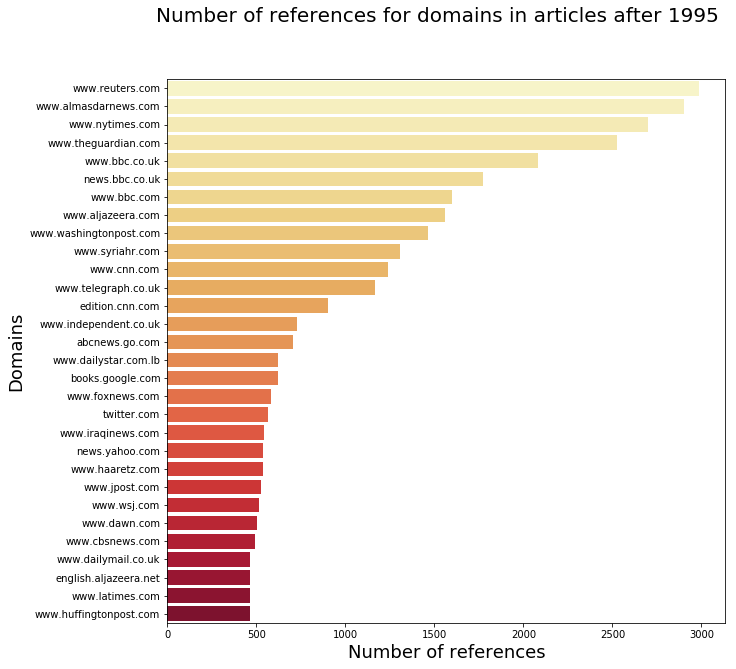

In [71]:
domains_distribution_pd30 = domains_distribution_pd.head(30)

# plot using bar plot
f, ax1 = plt.subplots()
plt.sca(ax1)
sns.barplot(domains_distribution_pd30['nb_ref'], domains_distribution_pd30.index, palette="YlOrRd", ax=ax1, orient='h')
plt.xlabel('Number of references',fontsize=18)
plt.ylabel('Domains',fontsize=18)
f.suptitle('Number of references for domains in articles after 1995', fontsize=20)
f.set_size_inches(10, 10)
plt.show()

For recent wikipedia conlfict-related articles (after 1995) most of the references come from the American, English and Arab media. American and English sources are no surprise as we are working with the English version of Wikipedia. In the top 5, [reuters](https://www.reuters.com) is the first! Interestingly, [almasdarnews](https://www.almasdarnews.com) is a close second. This online media source covers mostly conflicts in the Middle East: Syria, Yemen, and Iraq. 

That's one down, three more to go!

- [x] Number of references
- [ ] Number of views
- [ ] Article length
- [ ] Number of external links

# What about our other candidates?

Article length speaks for itself. The longer an article, the more likely it was edited and developed to fully cover the article topic. Looking at the number of views per page is also an important factor affecting the popularity of an article. Finally, the number of external links corresponds to the incoming links from other articles within Wikipedia.

Why not follow the trend? 

Exploring our other indicators of popularity 'article length', 'number of views', 'number of external links', let's see if these choices actually contribute to popularity of an article! 
To do so, we plot one indicator with respect to the other: we analyze if variables are either monotonic or independent, i.e. if article length increases, number of external links increases or does not vary. Imagine if 'article length' increases and at the same time 'number of views' decreases! Summing them up into popularity score would mean adding a negative coefficient otherwise the effect of one will partially cancel out the effect of the other one. 

,article_lenght,views,refs_count,link_count
article_lenght,1.000000,0.619499,0.715575,0.892395
views,0.619499,1.000000,0.477095,0.625089
refs_count,0.715575,0.477095,1.000000,0.582192
link_count,0.892395,0.625089,0.582192,1.000000


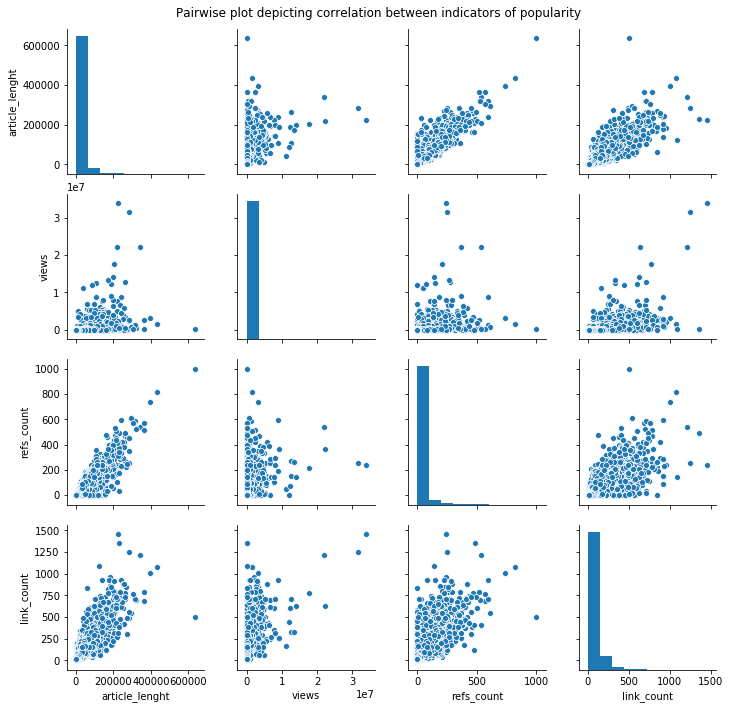

In [48]:
articles = pd.read_csv('../data/data_processed/data_processed.csv', index_col=0)
articles.index.names = ['id']
articles.head()
articles.end_date_clean = articles.end_date_clean.fillna(0)
ax = sns.pairplot(data=articles, vars=['article_lenght', 'views', 'refs_count', 'link_count']);
plt.subplots_adjust(top=0.95)
ax.fig.suptitle("Pairwise plot depicting correlation between indicators of popularity");
articles[['article_lenght', 'views', 'refs_count', 'link_count']].corr(method='spearman')

All variables seem more or less correlated, except 'views' that seem independent with respect to the others.
Also, the ranges are completely different! To be able to measure the influence of each component, they need to be comparable and thus on the same range to compute the popularity score. For this reason, we transform the features by scaling each feature to a range between 0 and 1 using [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
We used this standardization approach instead of normalization to maintain the structure of the data, i.e. to preserve the distribution of the features.

- [x] Number of references
- [x] Number of views
- [x] Article length
- [x] Number of external links

# Popularity score
For each article *x*, the popularity score is defined as:

 $score(x) = length(x) + views(x) + refs(x) + links(x)$

where 
* length is the scaled length of the article x
* views are the scaled number of views of the article x
* refs are the scaled number of references of the article x
* links are the scaled number of external links of the article x

### Article popularity 

In [87]:
pop_score_articles=pd.read_csv('../data/data_processed/articles_popularity_score.csv', index_col=0)

In [89]:
pop_score_articles.sort_values(by='popularity_score', ascending=False).head()

,title,categories,article_lenght,views,refs_count,link_count,death,locations,end_date_clean,ongoing,popularity_score
id,,,,,,,,,,,
32927,World War II,military conflict,0.350225,1.000000,0.238,1.000000,73000000,Russia Q159|Europe Q46|Africa Q15|Pacific ...,1945.0,False,2.588225
32611,Vietnam War,military conflict,0.534488,0.652728,0.536,0.832302,950765,South Vietnam Q180573,1975.0,False,2.555518
4764461,World War I,military conflict,0.446100,0.930421,0.254,0.860481,17000000,Europe Q46|Australia and Oceania Q55643|Mi...,1918.0,False,2.491002
52019122,Battle of Mosul (2016–2017),military conflict,1.000000,0.004915,1.000,0.341581,9100,Erbil Governorate Q213189|Nineveh Governora...,2017.0,False,2.346496
46230181,Saudi Arabian-led intervention in Yemen,military conflict,0.683026,0.046684,0.818,0.738144,0,Yemen Q805,0.0,True,2.285854


In [99]:
#articles
pop_score_articles.rename({'article_lenght':'scaled_length', 'views':'scaled_views',
                           'refs_count':'scaled_refs', 'link_count':'scaled_links'},axis='columns', inplace=True)

In [249]:
all_metrics_articles = pop_score_articles.merge(articles[
    ['article_lenght','views','refs_count','link_count']],on='id',how='inner')
all_metrics_articles.to_csv('../data/data_processed/NAS_articles_popularity_score.csv')

In [110]:
all_metrics_articles.sort_values(by='popularity_score', ascending=False).shape

(17467, 15)

In [113]:
all_metrics_articles['popularity_score'].describe().T

count    17467.000000
mean         0.106581
std          0.149411
min          0.001267
25%          0.033244
50%          0.059036
75%          0.117079
max          2.588225
Name: popularity_score, dtype: float64

In [132]:
pops = all_metrics_articles.sort_values(by='popularity_score', ascending=False).head()
middle_pop = pd.DataFrame(all_metrics_articles.loc[34975490]).T
no_pops = all_metrics_articles.sort_values(by='popularity_score', ascending=True).head()

In [133]:
best_worst_pops = pd.concat([no_pops, middle_pop, pops])
best_worst_pops

,title,categories,scaled_length,scaled_views,scaled_refs,scaled_links,death,locations,end_date_clean,ongoing,popularity_score,article_lenght,views,refs_count,link_count
49532277,Hashimiya attack,civilian attack,0.000558319,2.10427e-05,0,0.000687285,75,Hashimiya|Iraq,2014,False,0.00126665,881,753,0,2
58421339,Fifth Third Center shooting,civilian attack,0.000430928,4.31494e-05,0.001,0.000687285,0,NaN,0,False,0.00216136,800,1501,1,2
49429205,January 2015 Maiduguri suicide bombing,civilian attack,0.000470246,1.12011e-05,0.001,0.00206186,19,Maiduguri|Nigeria,0,False,0.0035433,825,420,1,4
50567259,Transkei War,military conflict,0.000786365,1.88557e-05,0,0.00274914,7000,South Africa Q258,1836,False,0.00355436,1026,679,0,5
56640476,Operation of Sidi Aïch,military conflict,0.00287023,4.87647e-06,0.001,0,0,Sidi Aïch|Tunisia,2015,False,0.00387511,2351,206,1,1
34975490,2012 Bucharest hair salon shooting,civilian attack,0.0174903,0.000127379,0.018,0.0233677,2,Bucharest Q19660,2012,False,0.0589854,11647,4351,18,35
32927,World War II,military conflict,0.350225,1,0.238,1,73000000,Russia Q159|Europe Q46|Africa Q15|Pacific ...,1945,False,2.58822,223212,33835972,238,1456
32611,Vietnam War,military conflict,0.534488,0.652728,0.536,0.832302,950765,South Vietnam Q180573,1975,False,2.55552,340373,22085710,536,1212
4764461,World War I,military conflict,0.4461,0.930421,0.254,0.860481,17000000,Europe Q46|Australia and Oceania Q55643|Mi...,1918,False,2.491,284173,31481685,254,1253
52019122,Battle of Mosul (2016–2017),military conflict,1,0.00491495,1,0.341581,9100,Erbil Governorate Q213189|Nineveh Governora...,2017,False,2.3465,636363,166343,1000,498


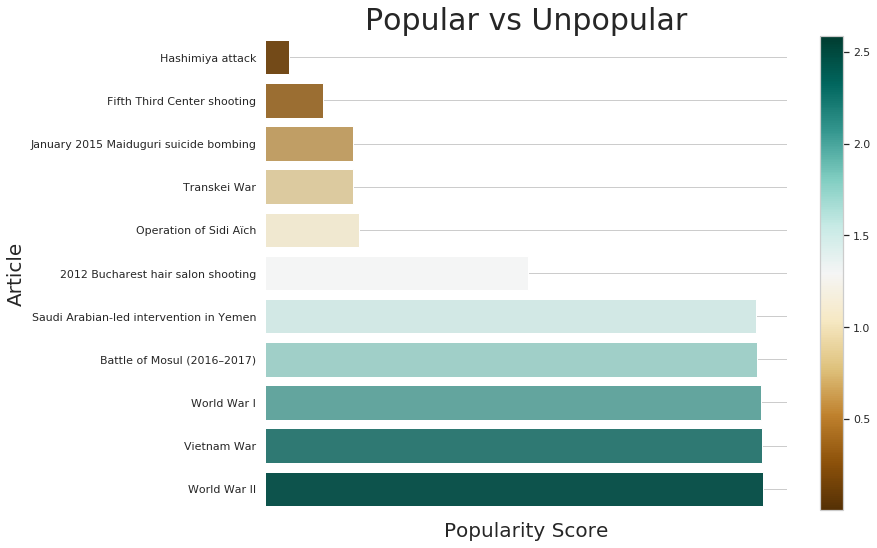

In [211]:
sort_best_worst_pops=best_worst_pops.sort_values(by='popularity_score')
f, axx = plt.subplots(figsize=(13, 8))
plot = plt.scatter(sort_best_worst_pops.title, sort_best_worst_pops.popularity_score, 
                   c=sort_best_worst_pops.popularity_score, 
                   cmap='BrBG')
plt.clf()
plt.colorbar(plot)
g = sns.barplot(
    x='popularity_score', y='title', data=sort_best_worst_pops, palette='BrBG')
g.set_xscale('log')
sns.despine(left=True, bottom=True)
g.axes.set_title("Popular vs Unpopular",fontsize=30)
g.set_xlabel("Popularity Score",fontsize=20)
g.set_ylabel("Article",fontsize=20)
sns.set(style="whitegrid")
plt.grid(axis='both')
plt.tight_layout()
plt.xticks([])
plt.show()

Not suprisingly, World War II is the most popular page! It has the highest popularity score of 2.59, with 
* article length: 223212	
* views: 33835972
* references: 238	
* external links: 1456

World War II being the most popular article hints that our metrics may be enough to encapsulate the popularity of a page. Because who hasn't studied World War II in school and looked up this article on Wikipedia?

# Is there a pattern between event date and popularity score?

We wonder if the attribution of the popularity score is partially influenced because of the event date and the importance of the article. By event date, we refer to the actual end date of the conflict the article is referring to (as our articles talk about conflicts). 
For now, the importance of an article is quantified by the number of deaths during that event.

Let's first have a quick look at the distribution of the article end dates.

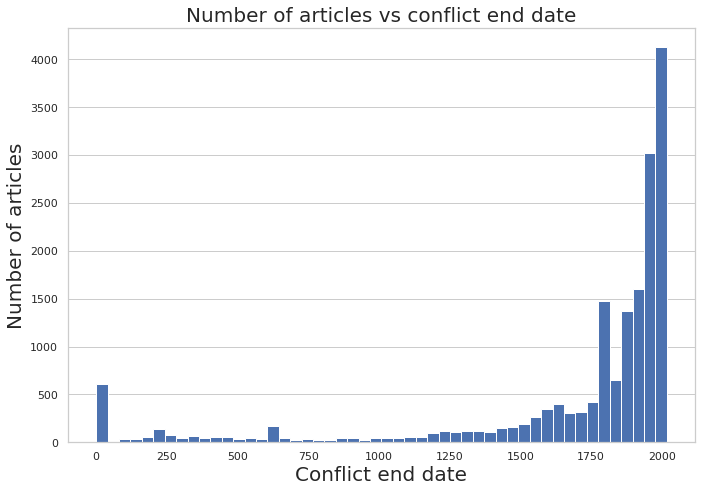

In [235]:
d = all_metrics_articles['end_date_clean'].hist(figsize=(10, 7), bins=50);
d.axes.set_title("Number of articles vs conflict end date",fontsize=20)
d.set_xlabel("Conflict end date",fontsize=20)
d.set_ylabel("Number of articles",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

The plot gives us a very broad range of conflict end dates. Since we are interested in more recent conflicts, 
as a first approach why don't we have a look at articles mentionning a conflict end date after 1910.

## __ FERMATI QUA_ ##

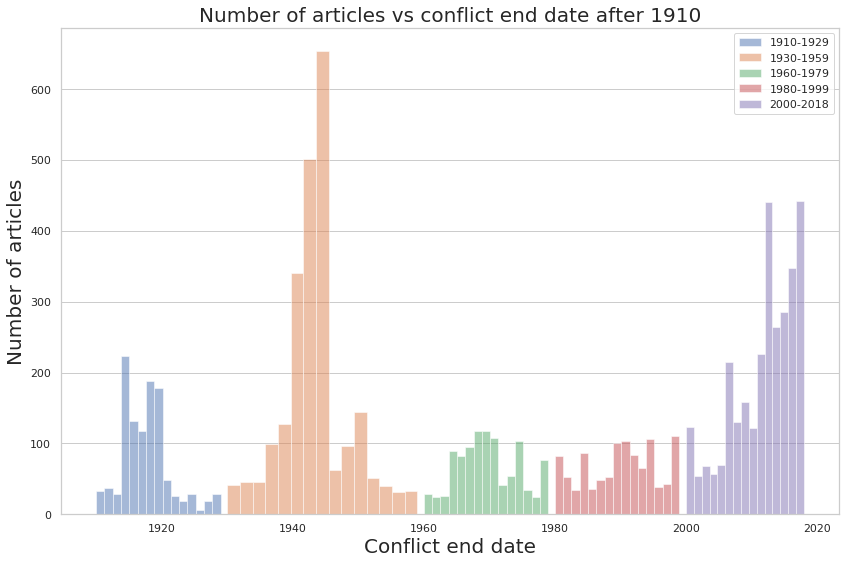

In [244]:
f = all_metrics_articles['end_date_clean'][(all_metrics_articles['end_date_clean'] >= 1910) &
                                           (all_metrics_articles['end_date_clean'] < 1930)
                                          ].hist(figsize=(12, 8), bins=15, alpha=0.5, label='1910-1929');
all_metrics_articles['end_date_clean'][(all_metrics_articles['end_date_clean'] >= 1930) &
                                           (all_metrics_articles['end_date_clean'] < 1960)
                                          ].hist(figsize=(12, 8), bins=15, alpha=0.5, label='1930-1959');
all_metrics_articles['end_date_clean'][(all_metrics_articles['end_date_clean'] >= 1960) &
                                           (all_metrics_articles['end_date_clean'] < 1980)
                                          ].hist(figsize=(12, 8), bins=15, alpha=0.5, label='1960-1979');
all_metrics_articles['end_date_clean'][(all_metrics_articles['end_date_clean'] >= 1980) &
                                           (all_metrics_articles['end_date_clean'] < 2000)
                                          ].hist(figsize=(12, 8), bins=15, alpha=0.5, label='1980-1999');
all_metrics_articles['end_date_clean'][(all_metrics_articles['end_date_clean'] >= 2000) &
                                           (all_metrics_articles['end_date_clean'] < 2019)
                                          ].hist(figsize=(12, 8), bins=15, alpha=0.5, label='2000-2018');

f.axes.set_title("Number of articles vs conflict end date after 1910",fontsize=20)
f.set_xlabel("Conflict end date",fontsize=20)
f.set_ylabel("Number of articles",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

Roughly five distinct population of articles are observed. The first peak around 1914 corresponds to World War I. Indeed, 1113 of our filtered articles have a end conflict end date between 1910-1930. The second peak around 1945 corresponds to World War 2, with more than 2300 articles belonging to that particular end conflict date. 

Since, we are more 

In [ ]:
# bar plot ongoing conclusion

In [44]:
date_ranges = [1990, 2000, 2010, 2019]

articles_with_cat['date_range'] = ''
articles_with_cat['date_range'][
    (articles_with_cat['end_date_clean'] >= date_ranges[0]) & (articles_with_cat['end_date_clean'] < date_ranges[1]) 
] = '{}-{}'.format(date_ranges[0], date_ranges[1] - 1)

articles_with_cat['date_range'][
    (articles_with_cat['end_date_clean'] >= date_ranges[1]) & (articles_with_cat['end_date_clean'] < date_ranges[2]) 
] = '{}-{}'.format(date_ranges[1], date_ranges[2] - 1)

articles_with_cat['date_range'][
    (articles_with_cat['end_date_clean'] >= date_ranges[2]) & (articles_with_cat['end_date_clean'] < date_ranges[3]) 
] = '{}-{}'.format(date_ranges[2], date_ranges[3] - 1)

/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


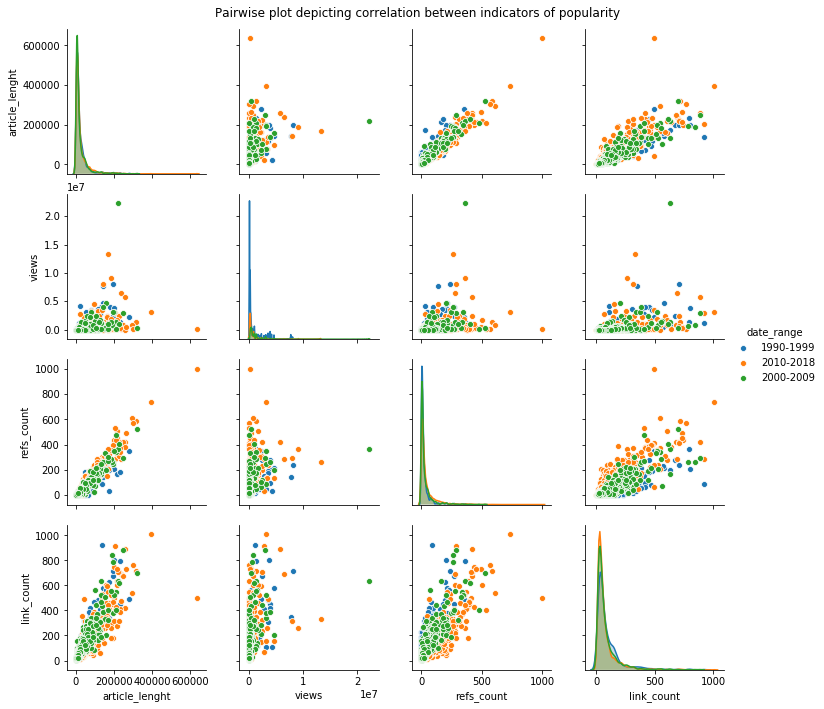

In [52]:
ax = sns.pairplot(data=articles_with_cat, 
                  vars=['article_lenght', 'views', 'refs_count', 'link_count'],
                  hue='date_range');
plt.subplots_adjust(top=0.95)
ax.fig.suptitle("Pairwise plot depicting correlation between indicators of popularity");

/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1196.0347764097096)

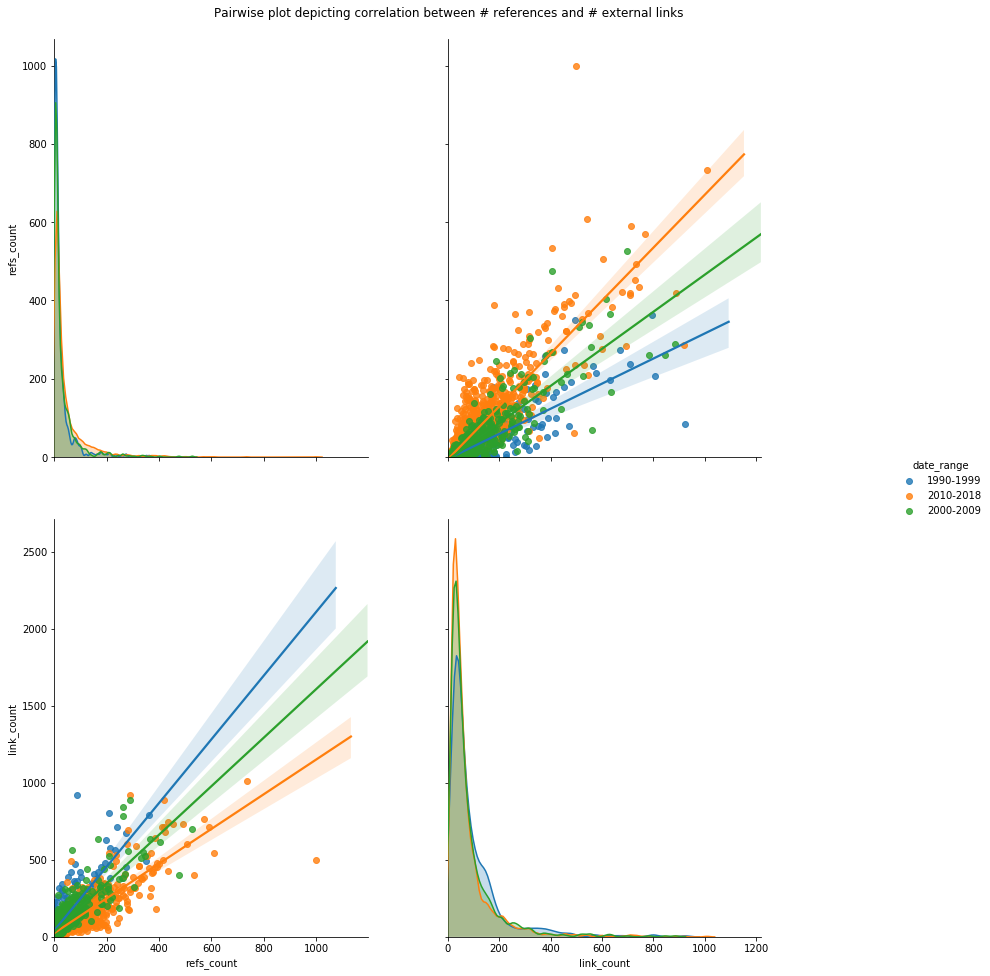

In [81]:
ax = sns.pairplot(data=articles_with_cat, 
                  vars=['refs_count', 'link_count'],
                  hue='date_range', kind='reg');
plt.subplots_adjust(top=0.95)
ax.fig.suptitle("Pairwise plot: correlation between # references and # external links");
ax.fig.set_size_inches(15,15)

axes = ax.axes
axes[0,1].set_ylim(0,)
axes[0,1].set_xlim(0,)
axes[1,1].set_ylim(0,)
axes[1,0].set_xlim(0,)

In [60]:
print(' 1990-1999 \n')
print(articles_with_cat[['article_lenght', 'views', 'refs_count', 'link_count']].where(
    articles_with_cat['date_range']=='1990-1999').corr(method='spearman'))
print("\n")

print(' 2000-2009 \n')
print(articles_with_cat[['article_lenght', 'views', 'refs_count', 'link_count']].where(
    articles_with_cat['date_range']=='2000-2009').corr(method='spearman'))
print("\n")

print('2010-2018 \n')
print(articles_with_cat[['article_lenght', 'views', 'refs_count', 'link_count']].where(
    articles_with_cat['date_range']=='2010-2018').corr(method='spearman'))
print("\n")


 1990-1999 

                article_lenght     views  refs_count  link_count
article_lenght        1.000000  0.610301    0.695211    0.937097
views                 0.610301  1.000000    0.552464    0.600451
refs_count            0.695211  0.552464    1.000000    0.625086
link_count            0.937097  0.600451    0.625086    1.000000


 2000-2009 

                article_lenght     views  refs_count  link_count
article_lenght        1.000000  0.694567    0.912723    0.916975
views                 0.694567  1.000000    0.623459    0.672154
refs_count            0.912723  0.623459    1.000000    0.821159
link_count            0.916975  0.672154    0.821159    1.000000


2010-2018 

                article_lenght     views  refs_count  link_count
article_lenght        1.000000  0.682599    0.969394    0.915438
views                 0.682599  1.000000    0.665828    0.668492
refs_count            0.969394  0.665828    1.000000    0.864690
link_count            0.915438  0.668492    0.86